<a href="https://colab.research.google.com/github/pedroagreda/TMD/blob/master/Classification_I(bueno).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification I

Notebook version:

0.0 (Sep 13, 2018) - Opened

Authors: Vanessa Gómez Verdejo (vanessa@tsc.uc3m.es), Óscar García Hinde (oghinde@tsc.uc3m.es), Simón Roca Sotelo (sroca@tsc.uc3m.es), Carlos Sevilla Salcedo (sevisal@tsc.uc3m.es)

 Consider a classification problem in which we want to decide the position of the switch in the figure given the signal $\mathcal{X}$ observed at its output. Consider the following hypotheses:

$\mathcal{H}=1$: the switch is in the upper position 

$\mathcal{H}=0$ : the switch is in the lower position


![Block Diagram](http://www.tsc.uc3m.es/~sevisal/ClassificationLab_BlockDiagram.png)

Knowing that the signal $\mathcal{T}$ at the input of the circuit has a uniform distribution between 0 and 1, complete the following sections:

# 1. Data Generation

Generate a set of $N$ random samples of the observation $X$ when the switch is in the lower position and another set of $N$ random samples when the switch is in the upper position. Note that this sample generation process is equivalent to samplig from the likelikehoods of $\mathcal{H}=0$ and $\mathcal{H}=1$, respectivelly.

Visualize their histograms to check that you are properly generating the data.

In [0]:
# Let's import some libraries
import numpy as np
import matplotlib.pyplot as plt

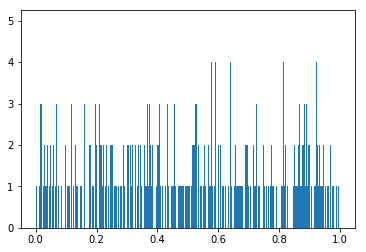

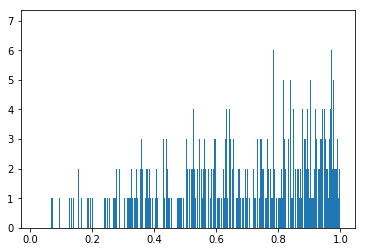

In [0]:
# 1. Sample generation from the two hypotheses.
#Generar muestras para H=0 Y H=1
#Muetrear las probabilidades de H=0 y H=1

np.random.seed(0) # fix the seed to get consistent results
N = 1000

# <FILL IN>
T= np.random.uniform(0,1,N)
fig = plt.figure()
plt.hist(T, bins=1000)
plt.show()
T1= np.random.uniform(0,1,N)
Tsqrt=np.sqrt(T1)
fig2 = plt.figure()
plt.hist(Tsqrt, bins=1000)
plt.show()

Now that you know how to generate samples from each likelihood, design a function that, given a vector `T` of size $N$ containing samples from the random variable $\mathcal{T}$, and the a priori probability of the null hypothesis $P_H(0)$, allows you to generate a complete set of observations consisting of:
* `X`: the set of $N$ generated observations where $N \times P_H(0)$ have to be observations from $H=0$ and the remaining ones from $H=1$.
* `H`: a set of indexes with values of $0$ and $1$ indicating whether each of the above observations belongs to the hypothesis of $0$ or $1$.

In [0]:
# 2. Define the data generation function
#Funcion que que addo un vector T de tamaño N y PH(0) genere:
#UN vector X de N observaciones donde N*PH(0) son observaciones de PH(0) y las restantes de PH(1)
def gen_data(p_0, T):
  # <FILL IN>
 
  X=[]
  H=[]
  #for de 1000 repeticiones que genera 1 a 1 variables aleatorias en N
  for i  in range(1000):
    N=np.random.rand(1)
    if N>p_0:
      #añade al array x
      X.append(T[i])
      #añade al array H
      H.append(0)
    else:  
      X.append(np.sqrt(T[i]))
      H.append(1)
    
  
  return (X, H)

Now, use the above function to generate data for two scenarios:
- In scenario 1 we will have $P_H(0) = \frac{1}{2}$
- In scenario 2 we will have $P_H(0) = \frac{1}{8}$


In [0]:
# 3. Generate data for the two scenarios.

# <FILL IN>
[X1,H1]=gen_data(0.5,T)
[X2,H2]=gen_data(0.125,T)
X1 = np.array(X1)
X2 = np.array(X2)
H1 = np.array(H1)
H2 = np.array(H2)

# 2. Likelihood Ratio Test

As you know, the LRT of this problem is given by:


>>>>$X \underset{D=0}{\overset{D=1}{\gtrless}} \eta$


This parameterization will let us define several classifiers by adjusting the $\eta$ threshold. Besides, we can use different thresholds in order to obtain a ROC curve (that is something we'll do below).   

The next step is to implement a classification function which, given the observation sample vector `X` and a decision threshold `eta`, will decide which hypothesis generated each sample and return the estimated decisions in vector `D`.

In [0]:
# 4. Code the decider function.
#Funcion de clasificacion dado X y eta decidira de que H viene y almecenara la decision en D

def LRT(X, eta):
  # <FILL IN>
  D=[]
  for i in range (len(X)):
    if X[i]<eta:
      D.append(0)
    else:  
      D.append(1)
  #D = (X>eta).astype(int)
  return D

D1=LRT(X1,0.5);
D2=LRT(X2,0.5);

In [0]:
# 4. Code the decider function.(BUENO)
#Funcion de clasificacion dado X y eta decidira de que H viene y almecenara la decision en D

def LRT(X, eta):
  D = (X>eta).astype(int)
  return D

D1=LRT(X1,0.5);
D2=LRT(X2,0.5);

Now we can apply the decider function to the samples from our two scenarios. For now, we will set the threshold to the value that corresponds to the ML classifier ($\eta =0.5$). 

Define the function `plot_trueVSest()` to visualize the effect of the ML classifier on both scenarios.  This new function has to be capable of plotting the data for each value of $H$ ($H = 0$ and $H = 1$) and, at the same time, show if the data has been correctly classified or not ($D$). You can include the threshold in the image to check if the plot is done correctly or not.

You can try different threshold values and check their effect on the decision.

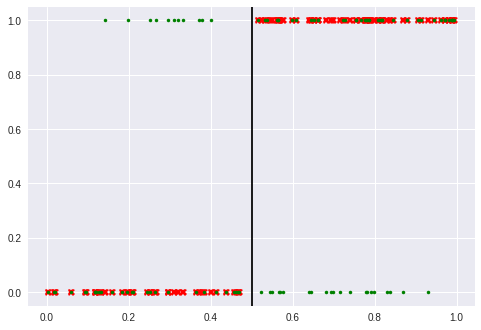

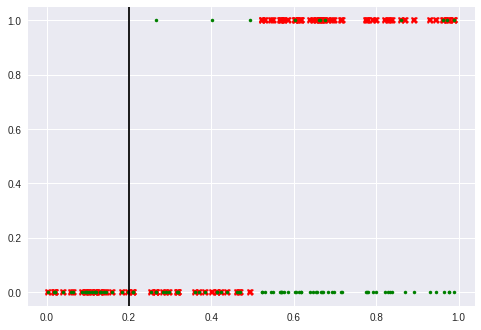

In [0]:
# 5. Apply the decider with a threshold of 0.5 and visualize the results.

def plot_trueVSest(X, H, D, eta):
  
  plt.figure()
  plt.plot(X,D,'rX')
  plt.plot(X,H,'g.')
  plt.axvline(eta, color='black')
  plt.show()
  # <FILL IN>
n_pl = 100
plot_trueVSest(X1[:n_pl], H1[:n_pl], D1[:n_pl], 0.5)
plot_trueVSest(X2[:n_pl], H2[:n_pl], D2[:n_pl], 0.2)


# 3. False Alarm and Missing Rates

In class we've learned how to obtain False Alarm and Missing probabilities by integrating out the likelihood distributions of hypotheses:

$P_{FA} = P\{D=1|H=0\} = \int_{R_1} p(x|0) dx$

$P_{D} = P\{D=0|H=1\}  = \int_{R_0} p(x|1) dx$

Remember that on the computer, rather than working directly with probability distributions we work with samples taken from said distributions. That's why we need to define approximations to $P_{FA}$ and $P_{D}$ to work with. We call these sample estimates the **False Alarm Rate** (FAR) and the **Missing Rate** (MR) respectively.


These sample estimates satisfy that, when $N\to\infty$, $FAR\to P_{FA}$ and $MR\to P_{M}$.


We can obtain these rates by counting the number of times a classifier commits a specific type of error, and diving it by the number of samples of the corresponding hypothesis:


$FAR = \frac{\#\{D=1, H = 0\}}{\# \{H=0\}}$

$MR = \frac{\#\{D=0, H = 1\}}{\# \{H=1\}}$

For instance, take a look at the following example:

In [0]:
#Para obtener las probabilidades de Falsa alarma y de probabilidad de pérdidas 
#contamos el numero de veces que ocurre un error del mismo tipo y lo dividimos por
#el numero de muestras de la hipotesis correspondiente
Some_hypotheses = np.array([0,1,0,1,0,1,0])
Some_samples = np.array([0,0.1,0.4,0.6,0.2,1,0.4])
eta = 0.39
Some_decisions = LRT(Some_samples,eta)

print('Original hypotheses:\n',Some_hypotheses)
print('\nDecisions:\n',Some_decisions)

print('\nHow many 0\'s where classified as 1? Let\'s see: ')
FA_indexes = np.where( (Some_hypotheses==0) & (Some_decisions ==1))[0]
FA_errors = len(FA_indexes)
print('\nThere are ' + str(FA_errors) + ' false alarm errors (check it!).')

print('\nFor the False Alarm rate, we only need to divide FA_errors by the number of 0\'s in the original hypotheses.')
FAR = FA_errors / len(np.where(Some_hypotheses==0)[0])
print('\nFalse Alarm Rate = ' + str(FAR) + '.')


Original hypotheses:
 [0 1 0 1 0 1 0]

Decisions:
 [0 0 1 1 0 1 1]

How many 0's where classified as 1? Let's see: 

There are 2 false alarm errors (check it!).

For the False Alarm rate, we only need to divide FA_errors by the number of 0's in the original hypotheses.

False Alarm Rate = 0.5.


We now need to define a function that calculates the rate of missing and the rate of false alarm given the true and estimated labels. Use the given function `check_far_mr()` to make sure that it's working correctly. Note that these rates will not perfectly match the probabilities of false alarm and missing that you obtained analytically. Why is this? 

In [0]:
# 6. Code a function that computes p_fa and p_m and check that it works.

def far_mr(H, D):
  # <FILL IN>
  FA_indexes = np.where( (H==0) & (D==1))[0]
  FA_errors = len(FA_indexes)
  far=FA_errors / len(np.where(H==0)[0])
  MR_indexes = np.where( (H==1) & (D==0))[0]
  MR_errors = len(MR_indexes)
  mr=MR_errors / len(np.where(H==1)[0])
  return (far, mr)

def check_far_mr(H, D, far, mr):
  """Check if the result is correct""" 
  from sklearn.metrics import roc_curve, auc
  # Compute ROC curve and ROC area for each class
  far_, tpr_, _ = roc_curve(H, D)
  if round(far, 4) == round(far_[1],4):
    print('The false alarm rate is correct. FAR =', str(round(far*100, 2)), '%')
  else:
    print('ERROR -- The false alarm rate is not correct')
  if round(mr, 4) == round(1 - tpr_[1], 4):
    print('The missing rate is correct. MR =', str(round(mr*100, 2)), '%')
  else:
    print('ERROR -- The mising rate is not correct')

[F,M]=far_mr(H1,D1)
check_far_mr(H1,D1,F,M)

The false alarm rate is correct. FAR = 48.17 %
The missing rate is correct. MR = 24.32 %


# 4. Receiver Operating Point

We will now calculate the Receiver Operating Point curve that contrasts the False Alarm Rate with the Missing Rate over a range of decider thresholds. 

Define a function called `ROC()` that receives as parameters the sample vector `X`, the true hypothesis vector `H` and the number of thresholds we want to sweep, `n_th`, which will control the resolution of our ROC curve (you will have to generate a vector of `n_th` valid thresholds and compute the FAR and MR values for each one). The function must return the vectors `FAR` and `MR` which contain the sets of false alarm rates and missing rates for the range of thresholds (hint: you will need to use the functions `far_mr()` and `LRT()` that you defined earlier).

Next, use the provided function `plot_ROC()` to visualize the curves for both scenarios. Are they any diferent?

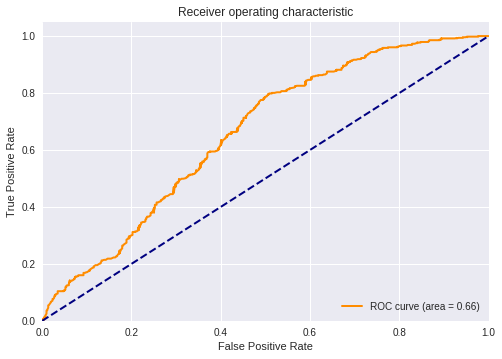

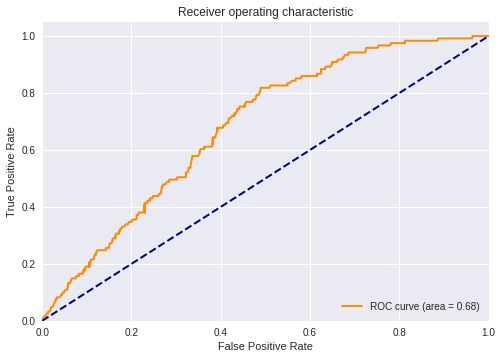

In [0]:
# 7. Compute and compare the ROC for both scenarios.
#Funcion llamada ROC recive X, H y el numero de umbrales que queremos barrer 
#Tenemos que generar un vector de umbrales barridos n_th y los valores de de FAR y MR


def ROC(X, H, n_eta):
  """Note that we've capitalized FAR and MR to indicate that they're vectors
  instead of single values!
  """
  # <FILL IN>
  MR=np.zeros(len(n_eta))
  FAR=np.zeros(len(n_eta))
  for (i,Ti) in enumerate(n_eta):
    D=LRT(X,Ti)
    [far, mr] = far_mr(H,D)
    FAR[i]=far
    MR[i]=mr
  
  
  return FAR, MR

def plot_ROC(FAR, MR):
  ix_ROC = np.argsort(FAR, axis=0)
  FAR_sort = FAR[ix_ROC].flatten() #Sorted false alarm rate
  TPR_sort = 1 - MR[ix_ROC].flatten() #Sorted true positive rate

  plt.figure()
  lw = 2
  plt.plot(FAR_sort, TPR_sort, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % np.trapz(TPR_sort,FAR_sort))
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

# <FILL IN>
n_eta=np.linspace(0, 1, 1000)

#Curva ROC para el primer escenario
[FAR1, MR1]= ROC(X1 , H1, n_eta)
plot_ROC(FAR1, MR1)

#Curva ROC para el segundo escenario
[FAR2, MR2]= ROC(X2 , H2, n_eta)
plot_ROC(FAR2, MR2)

# 5. Error Rate

In class we've computed error probabilities for binary classifiers using the False Alarm and Missing probabilities as:

$P_{e} = P_{H}(1)P_{M} + P_{H}(0)P_{FA} $

However, in this notebook we're working with sample estimates of these quantities. We'll therefore be talking about the **Error Rate** (ER) as a sample estimate of the probability of error (i.e., when $N\to\infty$, $ER\to P_{e})$. We'll obtain it as:

$ER = \frac{\#\{D \neq H \}}{\# data } $ 


We shall now plot the error rate vs. threshold curves for the two scenarios. To do so, you have to fill in the `error_curve()` function which computes the error rate for each element of a given set of thersholds. This function will take as arguments the set of observations `X`, the set of hypothesis indexes `H` and a range of thresholds `etas`.

In adition to the error curve, we expect this function to return the optimum threshold with regard to the error rate curve and its corresponding error rate. Apply it to both scenarios and compare the results with the analytical values. Are they the same? What classifier does the optimum threshold correspond to?


0.46446446446446443 0.3613613613613613


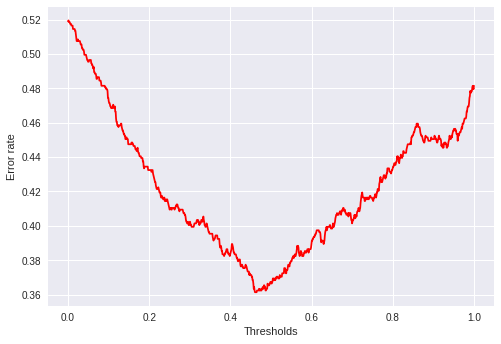

In [0]:
# 8. Define a function that plots the error rate curve.

def error_rate(X, H, etas):
  # <FILL IN>
  dif=0
  opt_eta=1
  min_err=1
  error_curve=np.zeros(len(etas))
  for (i,Ti) in enumerate(etas):
    
    for(e,Te) in enumerate(H):
      D=LRT(X,Ti)
      if D[e]!=Te:
        dif=dif+1
        
        
    dif=dif/len(X)
    error_curve[i]=dif
    if dif<min_err:
      min_err=dif
      opt_eta=Ti
    
  
  return opt_eta, min_err, error_curve
    


[opt_eta, min_err, error_curve] = error_rate(X1, H1, n_eta)

print(opt_eta, min_err)

plt.figure()
plt.plot(n_eta, error_curve, color='red')
plt.xlabel('Thresholds')
plt.ylabel('Error rate')
plt.show()
# <FILL IN>

# 6. ML, MAP and Neyman Pearson classifiers

As we've seen before, the ROC curve gives us information about the performance (detection rate vs. false alarm rate) of all the classifiers that can be obtained as a likelihood ratio test. Each point in the curve is linked to a different threshold.

In principle, there's no classifier better or worse than others -depending on the application, we will be interested in using different thresholds.

The Maximum a Posteriori decider (MAP), the Maximum Likelihood decider (ML) and the Neyman Pearson decider (NP) are indeed three points in this curve, since they can be formulated as a LRT. We already know that:
 * MAP minimizes error rate.
 * ML  compares the hypotheses likelyhoods as a decision criteria.
 * NP implies setting a max value for the False Alarm Probability, e.g. $P_{FA}\leq 0.1$, then choosing in the ROC the classifier with the highest Detection rate.
 
Modify the `plot_ROC()` function from excersise 7 so that it highlights the MAP and ML operating points. Apply this new version of the `plot_ROC()` function to both scenarios. What do you observe?

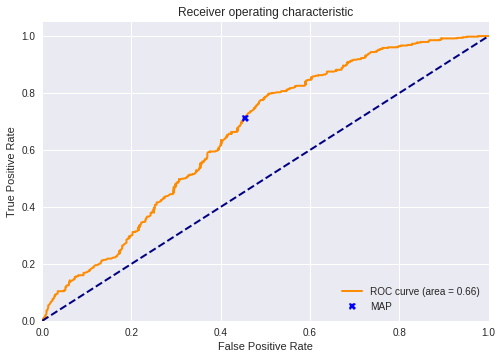

In [0]:
# 9. Modify the plot_ROC() function from excersise 7 so that it highlights the 
# MAP and ML operating points.

# <FILL IN>
def plot_ROC1(FAR, MR, error_curve, min_err):
  ix_ROC = np.argsort(FAR, axis=0)
  FAR_sort = FAR[ix_ROC].flatten() #Sorted false alarm rate
  TPR_sort = 1 - MR[ix_ROC].flatten() #Sorted true positive rate
  
  indice1 = 0
  indice2 = 0
  for(i, Ti) in enumerate(error_curve):
    if Ti==min_err:
      indice1=i
      
  plt.figure()
  lw = 2
  plt.plot(FAR_sort, TPR_sort, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % np.trapz(TPR_sort,FAR_sort))
  plt.plot(FAR_sort[indice1], TPR_sort[indice1], 'bX', label='MAP')
  #plt.plot(x[0], y[0], 'r.', label='ML')
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.show()

plot_ROC1(FAR1, MR1, error_curve, min_err)

If we were to use the Neyman Pearson classifier that guarantees a FAR of 0.1 ($\alpha = 0.1$), what would be its threshold value?

Compare with the value you obtained in class.